## Clasificación de imágenes
Para este ejemplo vas a montar un clasificador de imágenes del 0 al 9.

In [1]:
import numpy as np

In [2]:
from sklearn.datasets import load_digits
digits = load_digits() # 8x8 = 64 pixels  -- Very clean Dataset 

#### Now that you have the dataset loaded you can use the commands below

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [4]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [5]:
digits['data'][1700]

array([ 0.,  0.,  4.,  9., 12., 16.,  8.,  0.,  0.,  0., 15., 15.,  8.,
        8.,  2.,  0.,  0.,  4., 16., 11.,  4.,  1.,  0.,  0.,  0.,  8.,
       16., 16., 16., 14.,  0.,  0.,  0.,  0., 11.,  9.,  8., 16.,  0.,
        0.,  0.,  0.,  0.,  0.,  7., 16.,  0.,  0.,  0.,  0.,  0.,  8.,
       16., 12.,  0.,  0.,  0.,  0.,  3., 13.,  9.,  1.,  0.,  0.])

In [6]:
set(digits.target)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

#### Check the dataset

In [9]:
# Está balanceado?
import pandas as pd
pd.DataFrame(digits["target"]).value_counts()

0
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

#### Plot some numbers

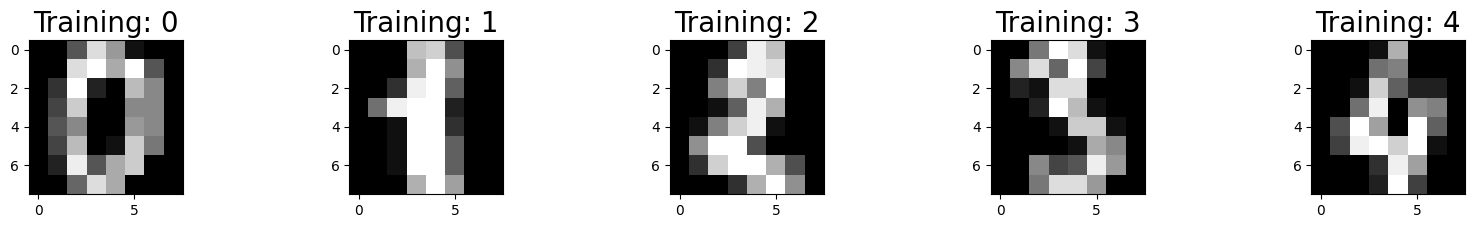

In [8]:
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    #plt.title('Training: %i\n' % label, fontsize = 20)
    plt.title('Training: ' + str(label), fontsize = 20)

In [21]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### Splitting Data into Training and Test Sets (Digits Dataset)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits["data"],
                                                   digits["target"],
                                                   test_size = 0.25,
                                                   random_state=42)

In [11]:
pd.DataFrame(y_test).value_counts(normalize=True)

0
5    0.131111
4    0.122222
9    0.106667
3    0.102222
6    0.100000
0    0.095556
7    0.091111
2    0.084444
8    0.084444
1    0.082222
Name: proportion, dtype: float64

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
for train_index, test_index in split.split(digits['data'], digits["target"]):
    X_train = digits["data"][train_index]
    X_test = digits["data"][test_index]
    y_train = digits["data"][train_index]
    y_test = digits["data"][test_index]

In [17]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (1347, 64) instead.

In [113]:
logisticRegr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### To predict

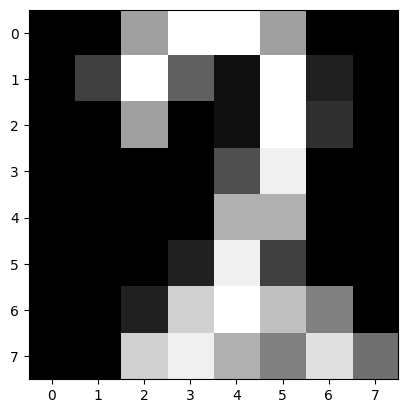

In [114]:
#plt.rcParams['figure.figsize'] = , 2
import matplotlib.pyplot as plt
first_test_image = X_test[1]
plt.imshow(np.reshape(first_test_image, (8,8)), cmap=plt.cm.gray);

In [84]:
y_test[1]

0

In [106]:
logisticRegr.predict(X_test)[1]
# logisticRegr.predict(x_test[1:2])

3

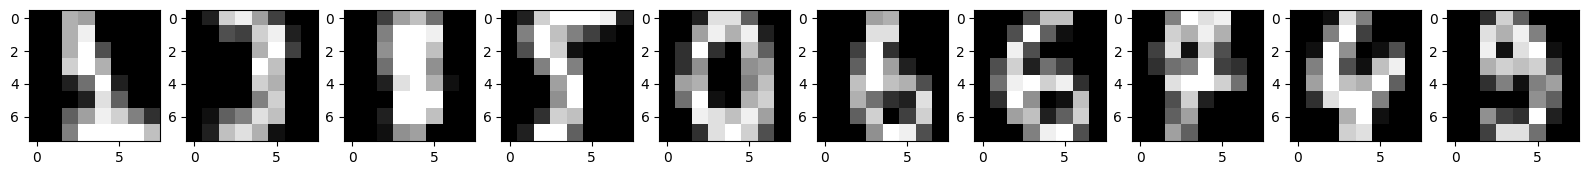

In [107]:
plt.figure(figsize=(20,2))
for index, (image, label) in enumerate(zip(X_test[0:10], y_test[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray);

In [108]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(X_test[:10])

array([1, 3, 1, 5, 0, 6, 6, 7, 4, 9])

In [88]:
y_test[:10]

array([1, 0, 9, 1, 5, 6, 7, 9, 1, 5])

### Probabilities

In [93]:
logisticRegr.predict_proba(X_test)[1]

array([9.99992819e-01, 2.16637970e-11, 2.65859272e-06, 4.31443980e-10,
       1.67128109e-12, 8.90268824e-08, 9.94692698e-07, 6.59983516e-07,
       2.48793270e-06, 2.90077018e-07])

### Measuring Model Performance (Digits Dataset)

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
y_pred = logisticRegr.predict(X_test)
score = accuracy_score(y_pred, y_test)
print(score * 100, "%")

95.43937708565072 %


In [116]:
y_pred_train = logisticRegr.predict(X_train)
score = accuracy_score(y_pred_train, y_train)
print(score * 100, "%")

100.0 %


899

### Matriz de confusión

Eje horizontal: falso positivo

Eje vertical: falso negativo

In [59]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[45  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  1  0  0  0  0  2  0]
 [ 0  1 43  0  0  0  0  0  0  0]
 [ 0  0  0 46  0  0  0  0  0  0]
 [ 0  0  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  1  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  4  0  0  0  1  1  0 37  0]
 [ 0  0  0  0  1  0  0  0  3 41]]


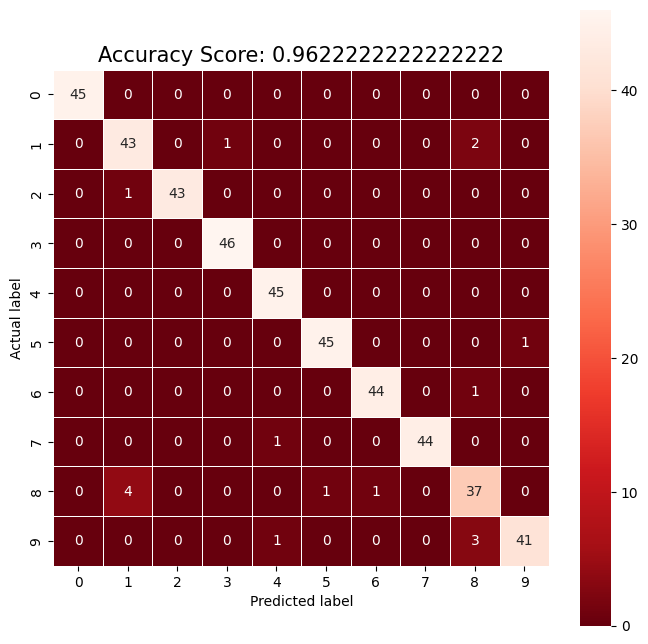

In [62]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

<Axes: >

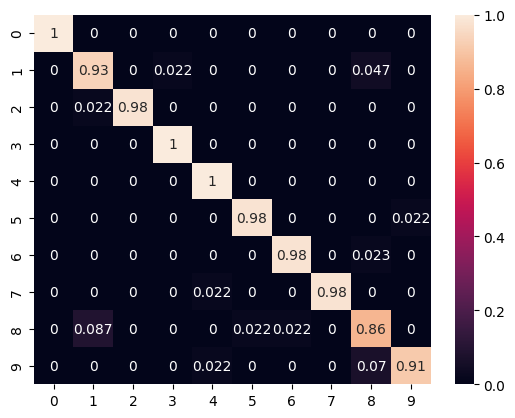

In [61]:
sns.heatmap(cm/cm.sum(axis=1), annot=True)

In [63]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(y_test, y_pred)

array([[[405,   0],
        [  0,  45]],

       [[399,   5],
        [  3,  43]],

       [[406,   0],
        [  1,  43]],

       [[403,   1],
        [  0,  46]],

       [[403,   2],
        [  0,  45]],

       [[403,   1],
        [  1,  45]],

       [[404,   1],
        [  1,  44]],

       [[405,   0],
        [  1,  44]],

       [[401,   6],
        [  6,  37]],

       [[404,   1],
        [  4,  41]]], dtype=int64)

In [126]:
data = pd.DataFrame(digits["data"])

In [127]:
data["target"] = digits["target"]

In [128]:
data = data.sample(frac=1, random_state=7)

In [132]:
round(len(data)*0.2)

359

In [133]:
round(len(data)*0.8)

1438

In [142]:
from sklearn.linear_model import LogisticRegression
X_train=data.iloc[0:1438]
y_train=data["target"].iloc[0:1438]
X_train.drop(columns=["target"], inplace=True)

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_11544\2730790706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=["target"], inplace=True)


In [143]:
X_test=data.iloc[1438:]
y_test=data["target"].iloc[1438:]
X_test.drop(columns=["target"], inplace=True)

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_11544\1079974148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=["target"], inplace=True)


In [144]:
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [145]:
pred_train = logisticRegr.predict(X_train)
pred_test = logisticRegr.predict(X_test)

In [147]:
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

1.0
0.9721448467966574


In [148]:
X_train=data.iloc[359:]
y_train=data["target"].iloc[359:]
X_train.drop(columns=["target"], inplace=True)

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_11544\83787497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(columns=["target"], inplace=True)


In [151]:
len(X_train)

1438

In [149]:
X_test=data.iloc[:359]
y_test=data["target"].iloc[:359]
X_test.drop(columns=["target"], inplace=True)

C:\Users\Jonatan\AppData\Local\Temp\ipykernel_11544\3717789010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(columns=["target"], inplace=True)


In [152]:
len(X_test)

359

In [153]:
logisticRegr = LogisticRegression(max_iter=1000)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [154]:
pred_train = logisticRegr.predict(X_train)
pred_test = logisticRegr.predict(X_test)

In [155]:
print(accuracy_score(y_train, pred_train))
print(accuracy_score(y_test, pred_test))

1.0
0.9498607242339833
